In [12]:
import sys
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0

Python 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
Pandas 1.3.5
Scikit-Learn 1.0.2
GPU is NOT AVAILABLE


Scikit-Learn provides a Perceptron class that implements a single-TLU
network. It can be used pretty much as you would expect—for example, on
the iris dataset

In [17]:
#load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") /255
images = np.array([china,flower])
batch_size, height, width, channels = images.shape

In [5]:
# Create 2 filters 
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=2, padding="SAME")

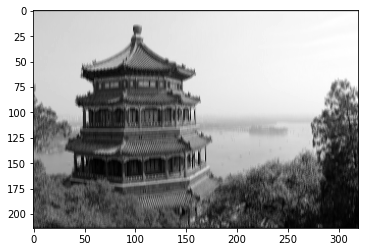

In [7]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

In [8]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [9]:
output = tf.nn.max_pool(images, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID")

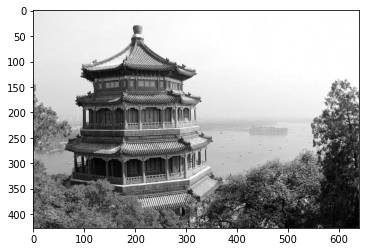

In [10]:
plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()

The next CNN reaches the 92% accuracy on the test set.
It's not state of the art but is pretty good.

In [11]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])